# Lab: Association Rules

The objective of this notebook is to apply association rules with the **mlxtend** library (<a href="https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/" >official documentation</a>). It provides the implementation of the **Apriori** (<a href="https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/" >link</a>) and **FP-Growth** (<a href="https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/" >link</a>) algorithms. It also provides you a function to generate **association rules** (<a href="https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/" >link</a>).





First, run the following cell to import some useful libraries to complete this Lab. If not already done, you must install them in your virtual environment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
pd.set_option('display.max_columns', 75)

If the previous cell outputs one the following error: `ModuleNotFoundError: No module named 'mlxtend'`, then, you have to install the mlxtend package. If you don't remember how to install a Python package, please retrieve the guide on Anaconda-Navigator.

To install **mlxtend** you can use one of the following commands from the terminal of your virtual environment: <br>
`pip install mlxtend` <br>
`conda install mlxtend`

<a id='1'></a>
## 1. Apriori


Firstly, you will load the first dataset for this lab into a DataFrame `df`. The dataset is stored in the csv file from the following path `"Groceries data.csv"`. Then you will encode the dataset into a transactional dataset, apply the **Apriori** algorithm to extract the **frequent itemsets**, and generate the **association rules**.

Run the following cell to load the dataset.

In [4]:
df = pd.read_csv("Groceries data.csv")

Now look the first 5 rows of the dataset.

In [5]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


Run the next cell to remove duplicates in your dataset.

In [6]:
df.drop_duplicates(inplace=True)# Dropping the duplicates
print(f"There are {len(df)} samples in the dataset.")

There are 38006 samples in the dataset.


In [7]:
df.columns

Index(['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

Now, let's plot the most frequent 10 items.

Index(['itemDescription', 'count'], dtype='object')


<Figure size 750x450 with 0 Axes>

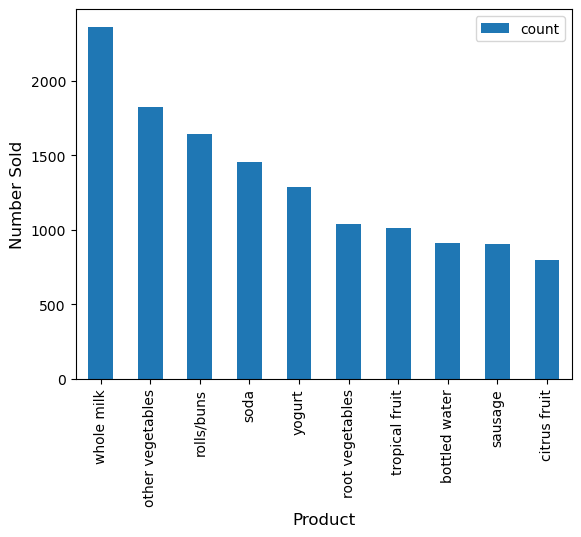

In [8]:
plt.figure(figsize=(5, 3), dpi=150)

# Check column names after reset_index()
df_counts = df.itemDescription.value_counts(ascending=False).reset_index()

# Print column names
print(df_counts.columns)

# Assuming the new column name is 'itemDescription' (replace it with the correct name)
df_counts.head(10).plot(kind='bar', x='itemDescription')

plt.xlabel('Product', size=12)
plt.ylabel('Number Sold', size=12)
plt.show()

### Exercise 1.1
You will first create a transactional DataFrame. You want to analyze each product bought by a member on each date. However, the items bought are one in each row. Therefore, you should group all the items bought by a member on a given date with the groupby operation provided in Pandas. We didn't cover this kind of operation so far. The code is already provided to you.

The next cell creates a DataFrame of **transactions**. Specifically, it **groups all the items** for each `Member_number` and `Date` into a **list of items** in a new column `transaction`.


In [9]:
#### START CODE HERE ####
#### Approximately 1 line ####
df_transactions = df.groupby(['Member_number','Date'])['itemDescription'].apply(list).reset_index(name='transaction')


#### END CODE HERE ####

df_transactions.head()

,Member_number,Date,transaction
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned juice, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"


#### Expected output
``` Member_number	    Date                                         transaction```<br>
```0	1000	    2014-06-24		   [whole milk, pastry, salty snack]```<br>
```1	1000	    2015-03-15		   [sausage, whole milk, semi-finished bread, yog...```<br>
```2	1000	    2015-05-27	           [soda, pickled vegetables]```<br>
```3	1000	    2015-07-24		   [canned beer, misc. beverages]```<br>
```4	1000	    2015-11-25		   [sausage, hygiene articles]```


In [10]:
print("Number of transactions:", len(df_transactions))
print("Number of distinct customers:", len(list(set(df_transactions["Member_number"]))))

Number of transactions: 14963
Number of distinct customers: 3898


### Exercise 1.2

Create a list containing all the transactions (i.e., list of list of items) into a variable `transactions`. Remember that all the transactions are stored in the `transaction` column of the DataFrame `df_transactions`. 


In [11]:
#### START CODE HERE ####
#### Approximately 1 line ####
# Assuming you already have df_transactions DataFrame
transactions = df_transactions['transaction'].tolist()

# Displaying the list of transactions
# print(transactions)

#### END CODE HERE ####

transactions[:5]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned juice', 'misc. beverages'],
 ['sausage', 'hygiene articles']]

#### Expected output
```[['whole milk', 'pastry', 'salty snack'],```<br>
``` ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],```<br>
``` ['soda', 'pickled vegetables'],```<br>
``` ['canned beer', 'misc. beverages'],```<br>
``` ['sausage', 'hygiene articles']]```


### Exercise 1.3

Encode the transactions into a **one-hot encoded transactional dataset**. Store the encoded dataset into a variable called `transaction_dataset`. You should first create a TransactionEncoder() object and then, call the fit_transform() method on your transactions (stored in the `transactions` variable). You can learn how to encode a list of transactions in a one-hot representation in the official documentation of the library (<a href="https://rasbt.github.io/mlxtend/api_modules/mlxtend.preprocessing/TransactionEncoder/" >link</a>).

In [12]:
#### START CODE HERE ####
#### Approximately 2 line ####

te = TransactionEncoder()
transaction_dataset = te.fit(transactions).transform(transactions)


#### END CODE HERE ####

transaction_dataset

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

#### Expected output

```array([[False, False, False, ...,  True, False, False],```<br>
```       [False, False, False, ...,  True,  True, False],```<br>
```       [False, False, False, ..., False, False, False],```<br>
```       ...,```<br>
```       [False, False, False, ..., False, False, False],```<br>
```       [False, False, False, ..., False, False, False],```<br>
```       [False, False, False, ..., False, False, False]])```

### Exercise 1.4

Now, let's create a DataFrame from the one-hot encoded `transaction_dataset` and store the dataframe in a variable `df_transactions_onehot`. Set the columns of the dataframe to the `transaction_encoder.columns_` values.

In [13]:
#### START CODE HERE ####
#### Approximately 1 line ####
df_transactions_onehot = pd.DataFrame(transaction_dataset, columns=te.columns_)
#### END CODE HERE ####

df_transactions_onehot.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled juice,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned fish,canned fruit,canned juice,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,...,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Exercise 1.5

Apply the **Apriori** algorithm on the datasted stored in `df_transactions_onehot`. Set the value of the minimum support `min_support` to 0.01 and the value of the parameter `use_colnames` to `True`. Replace `None` with your code.

In [14]:
#### START CODE HERE ####
#### Approximately 1 line ####
df_freq_itemsets = apriori(df_transactions_onehot, min_support=0.01, use_colnames=True)
#### END CODE HERE ####

df_freq_itemsets

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled juice)
...,...,...
64,0.010559,"(other vegetables, rolls/buns)"
65,0.014837,"(whole milk, other vegetables)"
66,0.013968,"(whole milk, rolls/buns)"
67,0.011629,"(soda, whole milk)"


Run the next cell to create a new column with the length of each transaction (i.e., the number of elements in each transaction).

In [15]:
df_freq_itemsets['length'] = df_freq_itemsets['itemsets'].apply(lambda x: len(x))
df_freq_itemsets

,support,itemsets,length
0,0.021386,(UHT-milk),1
1,0.033950,(beef),1
2,0.021787,(berries),1
3,0.016574,(beverages),1
4,0.045312,(bottled juice),1
...,...,...,...
64,0.010559,"(other vegetables, rolls/buns)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.013968,"(whole milk, rolls/buns)",2
67,0.011629,"(soda, whole milk)",2


### Exercise 1.6

Print the frequents itemset with length equal to 2 (stored in `df_freq_itemsets`). You can use masking on the pandas array.

In [16]:
#### START CODE HERE ####
#### Approximately 1 line ####
df_freq_itemsets[ (df_freq_itemsets['length'] == 2)]

#### END CODE HERE ####

,support,itemsets,length
64,0.010559,"(other vegetables, rolls/buns)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.013968,"(whole milk, rolls/buns)",2
67,0.011629,"(soda, whole milk)",2
68,0.011161,"(yogurt, whole milk)",2


### Exercise 1.7

Generate the association rules. Use `confidence` as metric and set the `min_threshold` to 0.01. Store the generated association rules in a DataFrame `df_ar`. Replace `None` with your code.

In [17]:
#### START CODE HERE ####
#### Approximately 1 line ####
df_ar = association_rules(df_freq_itemsets, metric = 'confidence', min_threshold = 0.01)

#### END CODE HERE ####

df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
2,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
3,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
6,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
7,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
8,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
9,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


You can see that are presents the antecedents and consequents columns showing the antecedents and consequents of the rules, and several metrics as the support and the confidence.

<a id='2'></a>
## 2. FP-Growth

In this exercise, you will have to generate association rules for another dataset. This time you will have to use the **FP-Growth** algorithm. However, the necessary steps are the same as in the previous exercise. This time, the exercise has no hints. Only the code for loading the dataset is provided. However, it is important to start implementing from scratch without the structure, reading the documentation if necessary.

Please use the following parameter values: minimum support in frequent itemset generation 0.01 and minimum threshold in rule generation 0.05.

You can find the documentation with a very detailed example at the following <a href="https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/#more-examples" >link</a>.

In [18]:
df = pd.read_csv("basket.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned juice,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
import csv
transactions = []


with open('basket.csv') as file_obj:
    reader_obj = csv.reader(file_obj)
    count = 0
    for row in reader_obj:
        if count != 0:
            trasaction = [x for x in row if x != '']
            transactions.append(trasaction)
        count += 1

Print the first two transactions.

In [20]:
transactions[:2]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']]

Notice that the transactions are stored in a list of list.

In [28]:
te = TransactionEncoder()
transaction_dataset = te.fit(transactions).transform(transactions)

df_transactions_onehot = pd.DataFrame(transaction_dataset, columns=te.columns_)

df_freq_itemsets = fpgrowth(df_transactions_onehot, min_support=0.01, use_colnames=True)

df_ar = association_rules(df_freq_itemsets, metric = 'confidence', min_threshold = 0.05)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
8,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
9,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
